# Pymaceuticals Inc.
---

### Analysis
* Your analysis here ...

In [181]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import sem
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(study_results, mouse_metadata, on = "Mouse ID")

# Display the data table for preview
# print(study_results)
# print(mouse_metadata)
mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [3]:
# Checking the number of mice.
mouse_number = len(mouse_study["Mouse ID"].unique())
mouse_number

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_duplicates = mouse_study.loc[mouse_study.duplicated(subset = ["Mouse ID", "Timepoint"])]
mice_duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Optional: Get all the data for the duplicate mouse ID.
check = mouse_study.loc[mouse_study["Mouse ID"]=='g989']
check

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean = mouse_study.drop(mouse_study.loc[mouse_study["Mouse ID"]=="g989"].index)
clean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [7]:
# Checking the number of mice in the clean DataFrame.
len(clean["Mouse ID"].unique())

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# capomulin = clean.loc[clean["Drug Regimen"]=='Capomulin']
# capomulin.head(30)
# Create DataFrame specificaly for Drug Regimen and Tumor Volume
drug_tumor = clean.loc[:,["Drug Regimen","Tumor Volume (mm3)"]]

# Group by Drug Regimen to apply different statistics to Tumor Volume categorized by Drug Regimen
grouped = drug_tumor.groupby("Drug Regimen")["Tumor Volume (mm3)"]

# Get names of the Drug Regimen
# drugs = grouped.groups.keys()

# Calculate statistics
mean = grouped.mean()
median = grouped.median()
variance = grouped.var()
stddev = grouped.std()
stderr = grouped.sem()

# Save statistics to separate DataFrame
summary_stat = pd.DataFrame({
    "Mean Tumor Volume": mean,
    "Median Tumor Volume": median,
    "Tumor Volume Variance": variance,
    "Tumor Volume Std. Dev.": stddev,
    "Tumor Volume Std. Err.": stderr
})
summary_stat

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg = drug_tumor.groupby("Drug Regimen").aggregate(["mean", "median", "var", "std", "sem"])
agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Unique Mice Tested')

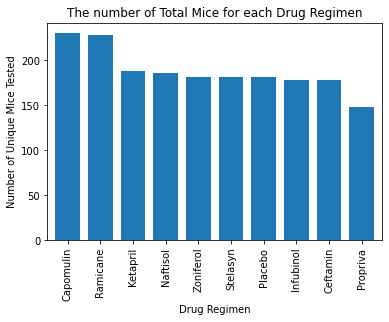

In [30]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

# get the data - mice group by drug regimen
mice_regimen = clean.groupby("Drug Regimen")["Mouse ID"].count().sort_values(ascending = False)

# generate chart using pandas
chart = mice_regimen.plot(kind = "bar", width = 0.75,
#                           figsize=(6,4),
                          title = "The number of Total Mice for each Drug Regimen")
chart.set_xlim()
chart.set_ylabel("Number of Unique Mice Tested")


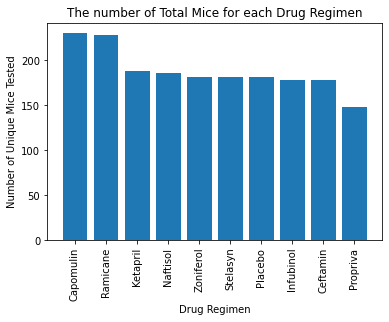

In [27]:
# Generate a bar plot showing the total number of unqiue mice tested on each drug regimen using using pyplot.

# set x axis and tick locations
x_axis = np.arange(len(mice_regimen))
tick_locations = [x for x in x_axis]

plt.bar(x_axis, mice_regimen)
plt.xticks(tick_locations, mice_regimen.index.values, rotation=90)
plt.title("The number of Total Mice for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice Tested")
plt.xlim(-0.75, len(x_axis)-0.25)
plt.show()


<AxesSubplot:ylabel='Sex'>

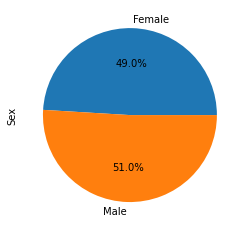

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex = clean.groupby("Sex")["Sex"].count()
pie_series = pd.Series(sex, index=sex.index.values, name="Sex")
pie_series.plot(kind = "pie", autopct="%1.1f%%")

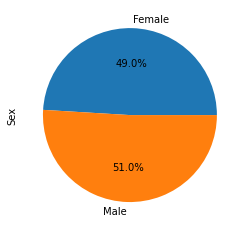

In [42]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(sex, labels=sex.index.values, autopct="%1.1f%%")
plt.ylabel("Sex", rotation = 90)
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [84]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Start by getting the last (greatest) timepoint for each mouse
final_tumor = clean.groupby(["Drug Regimen", "Mouse ID"])["Tumor Volume (mm3)"].last()
tocsv = clean.groupby(["Drug Regimen", "Mouse ID"])["Tumor Volume (mm3)"].sum()
tocsv.to_csv("test.csv")

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

In [104]:
# 36.321346
check1 = clean.loc[(clean["Tumor Volume (mm3)"]>30)&(clean["Tumor Volume (mm3)"]<32)]
# &(clean["Drug Regimen"]=="Capomulin")
# check1 = clean.loc[(clean["Drug Regimen"]=='Infubinol')&(clean["Timepoint"]==45)]
check1
# clean.dtypes

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
459,j913,40,31.001861,1,Ramicane,Female,4,17
460,j913,45,31.560470,1,Ramicane,Female,4,17
511,k403,30,31.099498,1,Ramicane,Male,21,16
572,g791,35,30.960392,1,Ramicane,Male,11,16
573,g791,40,31.369406,1,Ramicane,Male,11,16
604,m546,45,30.564625,1,Ramicane,Male,18,16
616,n364,45,31.095335,1,Ramicane,Male,4,17
626,s508,45,30.276232,0,Ramicane,Male,1,17
646,z578,45,30.638696,0,Ramicane,Male,11,16
1689,r554,40,31.804841,3,Capomulin,Female,8,17


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
    
    # Determine outliers using upper and lower bounds

#     # Example outlier plot of reaction times
# times = [96,98,100,105,85,88,95,100,101,102,97,98,5]
# fig1, ax1 = plt.subplots()
# ax1.set_title('Reaction Times at Baseball Batting Cage')
# ax1.set_ylabel('Reaction Time (ms)')
# ax1.boxplot(times)
# plt.show()   

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [108]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# treatment_list = ["Infubinol"]

# Create empty list to fill with tumor vol data (for plotting)

# final_tumor.plot(kind = 'bar')

tumor_vol_list = []
outliers = []

for drug in treatment_list:
    tumor_volume = clean.loc[clean["Drug Regimen"] == drug].groupby(
    "Mouse ID")["Tumor Volume (mm3)"].last()
    quartiles = tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    tumor_vol_list.append({drug:tumor_volume})
#     print(tumor_vol_list)
    for size in tumor_volume:
        if (size<lower_bound)|(size>upper_bound):
            outliers.append({drug:size})
    
    
# capomulin_tumor = clean.loc[clean["Drug Regimen"] == treatment_list[0]].groupby(
#     "Mouse ID")["Tumor Volume (mm3)"].last()

# quartiles = capomulin_tumor.quantile([.25,.5,.75])
# lowerq = quartiles[0.25]
# upperq = quartiles[0.75]
# iqr = upperq-lowerq
# lower_bound = lowerq - (1.5*iqr)
# upper_bound = upperq + (1.5*iqr)
# for size in capomulin_tumor:
#     if (size<lower_bound)|(size>upper_bound):
#         outliers.append({"Capomulin":size})
print(tumor_vol_list)       
print(outliers)

# capomulin_tumor = final_tumor.loc[final_tumor["Drug Regimen"] == treatment_list[0]]
# capomulin_tumor


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
    
    # Determine outliers using upper and lower bounds


[{'Capomulin': Mouse ID
b128    38.982878
b742    38.939633
f966    30.485985
g288    37.074024
g316    40.159220
i557    47.685963
i738    37.311846
j119    38.125164
j246    38.753265
l509    41.483008
l897    38.846876
m601    28.430964
m957    33.329098
r157    46.539206
r554    32.377357
r944    41.581521
s185    23.343598
s710    40.728578
t565    34.455298
u364    31.023923
v923    40.658124
w150    39.952347
w914    36.041047
x401    28.484033
y793    31.896238
Name: Tumor Volume (mm3), dtype: float64}, {'Ramicane': Mouse ID
a411    38.407618
a444    43.047543
a520    38.810366
a644    32.978522
c458    38.342008
c758    33.397653
d251    37.311236
e662    40.659006
g791    29.128472
i177    33.562402
i334    36.374510
j913    31.560470
j989    36.134852
k403    22.050126
m546    30.564625
n364    31.095335
q597    45.220869
q610    36.561652
r811    37.225650
r921    43.419381
s508    30.276232
u196    40.667713
w678    43.166373
y449    44.183451
z578    30.638696
Name: Tumor

Drug Regimen  Mouse ID
Capomulin     b128        38.982878
              b742        38.939633
              f966        30.485985
              g288        37.074024
              g316        40.159220
                            ...    
Zoniferol     q633        70.827796
              s337        62.109651
              w140        47.717952
              w575        68.401286
              x613        48.077646
Name: Tumor Volume (mm3), Length: 248, dtype: float64

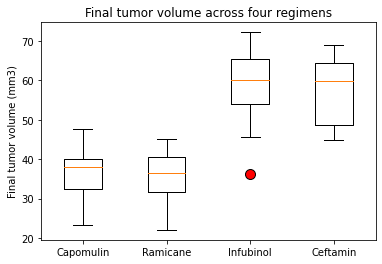

In [154]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Generate a facet plot of all 3 figures
# fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharey=True, sharex = True)
# fig, (ax1, ax2, ax3, ax4) = plt.subplots()
# fig.suptitle("Final tumor volume across four regimens", fontsize=16, fontweight="bold")

# x_s = np.arange(0, len(treatment_list), 1) + 1

# ax1.set_xlim(min(year), max(year))
# ax1.errorbar(year, violent_crime_rate, linewidth=1, marker="o")

# print(tumor_vol_list[0][treatment_list[0]].mean())
data = [tumor_vol_list[x][treatment_list[x]] for x in range(0, len(treatment_list))]

fig, ax = plt.subplots()
ax.boxplot(data, labels = treatment_list, flierprops=dict(markerfacecolor="r", markersize=10))
ax.set_title("Final tumor volume across four regimens")
ax.set_ylabel("Final tumor volume (mm3)")

plt.show()

# ax.errorbar(x_s, tumor_vol_list[0][treatment_list[0]], sem(tumor_vol_list[0][treatment_list[0]]), fmt="o")
# ax.set_xlim(0, len(vehicle_sample_set) + 1)
# ax.set_ylim(20,28)
# ax1.set_xlabel("Sample Number")
# ax1.set_ylabel("Mean MPG")

# ax1.plot(year, vc_fit, "b--", linewidth=1)
# ax1.set_ylabel("Violent Crime Rate")

# ax2.boxplot(tumor_vol_list[1][treatment_list[1]])
# ax2.plot(year, m_fit, "r--", linewidth=1)
# ax2.set_ylabel("Murder Rate")

# ax3.plot(year, aggravated_assault_rate, linewidth=1, marker="o", color="g")
# ax3.plot(year, aa_fit, "g--", linewidth=1)
# ax3.set_ylabel("Aggravated Assault Rate")
# ax3.set_xlabel("Year")


## Line and Scatter Plots

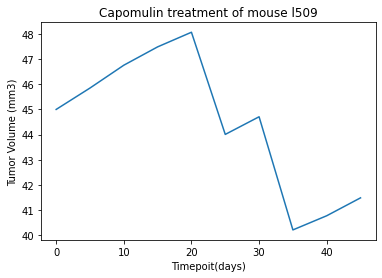

In [163]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# mouse = input("Choose mouse to see the progress of Capomulin treatment")
mouse = "l509"
capomulin_mouse = clean.loc[(clean["Mouse ID"] == mouse)&(clean["Drug Regimen"] == "Capomulin")]

plt.plot(capomulin_mouse.Timepoint, capomulin_mouse["Tumor Volume (mm3)"])
plt.title(f"Capomulin treatment of mouse {mouse}")
plt.xlabel("Timepoit(days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

Text(0.5, 1.0, 'Mouse Weight vs Average Tumor Volume')

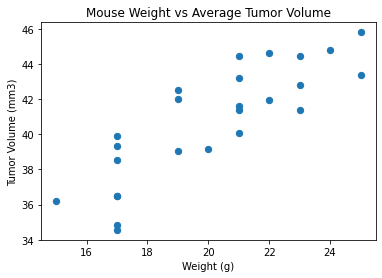

In [194]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Get weight and avrage tumor volume data for each mouse from initial data set for Capomulin drug regimen
capomulin_mice = clean[["Mouse ID", "Tumor Volume (mm3)", "Weight (g)"]].loc[
    clean["Drug Regimen"] == "Capomulin"].groupby("Mouse ID").mean()
capomulin_mice

weights = capomulin_mice["Weight (g)"]
volumes = capomulin_mice["Tumor Volume (mm3)"]

# Generate scatter plot
plt.scatter(weights, volumes)
plt.title("Mouse Weight vs Average Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
# scatter_plot = capomulin_mice.plot.scatter(x = "Weight (g)", y = "Tumor Volume (mm3)", s=40)
# scatter_plot.set_title("Mouse Weight vs Average Tumor Volume")

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


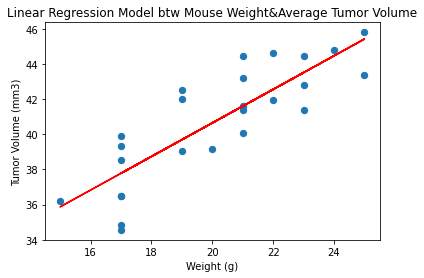

In [196]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Calculate correlation usong scipy pearsonr method
correlation = st.pearsonr(weights, volumes)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

# Calculate linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(weights, volumes)
regress_values = weights * slope + intercept

scatter_plot = capomulin_mice.plot.scatter(x = "Weight (g)", y = "Tumor Volume (mm3)", s=40)
scatter_plot.set_title("Linear Regression Model btw Mouse Weight&Average Tumor Volume")
plt.plot(weights,regress_values,"r-")
plt.show()